<a href="https://colab.research.google.com/github/ROUNAK001/CORIZO-MINOR-PROJECT/blob/main/CORIZO_MINOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING NUMPY LIBRARY

In [ ]:
import numpy as np

In [ ]:
# LOADING THE CSV FILES USING NUMPY

In [ ]:
# LOADING THE CSV FILE FOR FEMALES

FEMALE = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=",", skip_header=1)
display(FEMALE)

# LOADING THE CSV FILE FOR MALES

MALE = np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=",", skip_header=1)
display(MALE)

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 97.1, 160.2,  34.7, ...,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5, ...,  38.5, 125.5, 103.1],
       ...,
       [ 73. , 159.6,  36.2, ...,  31.4, 104.6,  99.3],
       [ 78.6, 168.5,  38.1, ...,  36. , 102.4,  98.5],
       [ 82.8, 147.8,  34.8, ...,  39.5, 121.4, 110. ]])

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 98.8, 182.3,  42. , ...,  38.2, 108.2, 120.4],
       [ 74.3, 184.2,  41.1, ...,  30.2,  94.5,  86.8],
       ...,
       [108.8, 168.7,  38.6, ...,  33.6, 118. , 114.7],
       [ 79.5, 176.4,  39.5, ...,  31.4,  99.8,  97.1],
       [ 59.7, 167.5,  40.3, ...,  29.2,  90.5,  86.9]])

In [ ]:
# STORING ONLY THE WEIGHTS IN SEPARATE VARIABLE EXCLUDING HEADERS

In [ ]:
female_weights = np.delete(FEMALE[:, 0],0, axis = 0)
male_weights = np.delete(MALE[:, 0],0, axis = 0)
print(female_weights)
print(male_weights)

[97.1 91.1 73.  ... 73.  78.6 82.8]
[ 98.8  74.3 103.7 ... 108.8  79.5  59.7]


In [ ]:
# CONVERTING THE STRING VALUES TO FLOAT

In [ ]:
female_weights = female_weights.astype(float)
male_weights = male_weights.astype(float)

In [ ]:
# IMPORTING MATPLOTLIB LIBRARY

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# PLOTTING A HISTOGRAM

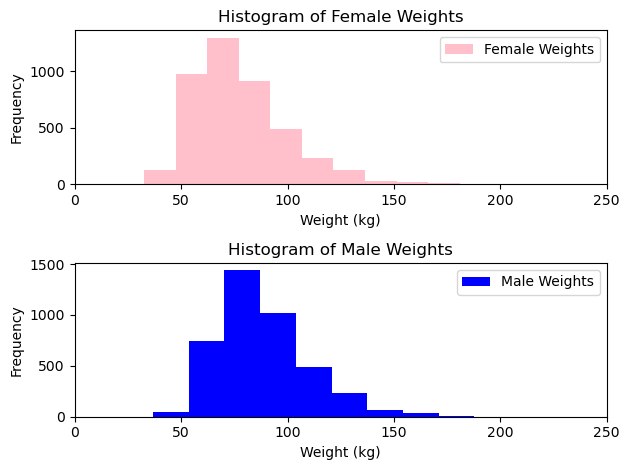

In [ ]:
# CREATING THE TOP SUBFIGURE FOR FEMALE WEIGHTS

plt.subplot(2, 1, 1)
plt.hist(female_weights, color='pink', label='Female Weights')
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim([0, 250])
plt.legend()

# CREATING THE TOP SUBFIGURE FOR MALE WEIGHTS

plt.subplot(2, 1, 2)
plt.hist(male_weights, color='blue', label='Male Weights')
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.xlim([0, 250])
plt.legend()

# ADJUSTING THE SPACES

plt.tight_layout()
plt.show()

In [ ]:
# CREATING A BOX-AND-WHISKER PLOT

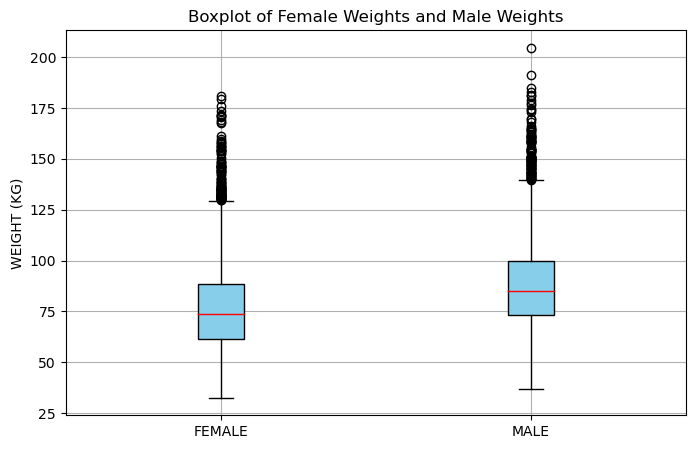

In [ ]:
plt.figure(figsize=(8, 5))
weights=[female_weights, male_weights]
plt.boxplot(weights, labels=['FEMALE', 'MALE'], patch_artist=True, boxprops=dict(facecolor="skyblue"),
    medianprops=dict(color="red"))
plt.title("Boxplot of Female Weights and Male Weights")
plt.ylabel("WEIGHT (KG)")
plt.grid(True)
plt.show()


RESULTS - WE CONCLUDE THAT, THE MALE WEIGHTS HAVE A HIGHER MEDIAN COMPARED TO FEMALE WEIGHTS WHICH MEANS ON AVERAGE, THE MALES TEND TO WEIGH MORE THAN THE FEMALES.

In [ ]:
# COMPUTING A BASIC NUMERICAL AGGREGATES FOR MALE AND FEMALE WEIGHTS AND COMPARING THE TWO DISTRIBUTIONS FOR EACH GENDER

In [ ]:
# COMPUTING MEASURES FOR FEMALES

female_stats = {
    "Mean": np.mean(female_weights),
    "Median": np.median(female_weights),
    "Standard Deviation": np.std(female_weights),
    "IQR": np.percentile(female_weights, 75) - np.percentile(female_weights, 25),
    "Range": np.ptp(female_weights),
    "Skewness": (np.mean(female_weights) - np.median(female_weights)) / np.std(female_weights)
}

# COMPUTING MEASURES FOR MALES

male_stats = {
    "Mean": np.mean(male_weights),
    "Median": np.median(male_weights),
    "Standard Deviation": np.std(male_weights),
    "IQR": np.percentile(male_weights, 75) - np.percentile(male_weights, 25),
    "Range": np.ptp(male_weights),
    "Skewness": (np.mean(male_weights) - np.median(male_weights)) / np.std(male_weights)
}

# DISPLAYING THE RESULTS

print("Female Weights Statistics:\n", female_stats)
print("Male Weights Statistics:\n", male_stats)

Female Weights Statistics:
 {'Mean': 77.40379057095475, 'Median': 73.6, 'Standard Deviation': 21.54250829019315, 'IQR': 27.1, 'Range': 148.3, 'Skewness': 0.1765713871251645}
Male Weights Statistics:
 {'Mean': 88.36454300416565, 'Median': 85.0, 'Standard Deviation': 21.418936717962495, 'IQR': 26.5, 'Range': 167.8, 'Skewness': 0.15708263432815775}


RESULTS - COMPARING THE DISTRIBUTIONS -

- MALE WEIGHTS TEND TO BE HIGHER THAN FEMALE WEIGHTS DUE TO HIGHER MEASURES OF MEAN AND MEDIAN.
- THE DISPERSION (VARIABILITY) OF WEIGHTS IS SIMILAR BETWEEN THE TWO GROUPS, BUT MALES HAVING A SLIGHTLY WIDER RANGE.
- BOTH DISTRIBUTIONS ARE NEARLY SYMMETRIC WITH A SLIGHT RIGHT SKEWNESS, AS THE SKEWNESS VALUES ARE CLOSE TO 0. NEITHER DISTRIBUTION EXHIBITS SIGNIFICANT ASYMMETRY.


In [ ]:
# ADDING 8TH COLUMN TO THE FEMALE DATASET FOR THE BODY MASS INDICES OF THE FEMALE PARTICIPANTS

FEMALE = np.delete(FEMALE[:, ],0, axis = 0)
female_bmi = female_weights[:, ] / ((female_weights[0:, ] / 100) ** 2)
new_FEMALE = np.column_stack((FEMALE, female_bmi))

# STANDARDIZING THE FEMALE DATASET AND STORING IN A NEW MATRIX (zfemale)

female_mean = np.mean(new_FEMALE)
female_std = np.std(new_FEMALE)
zfemale = (new_FEMALE - female_mean) / female_std


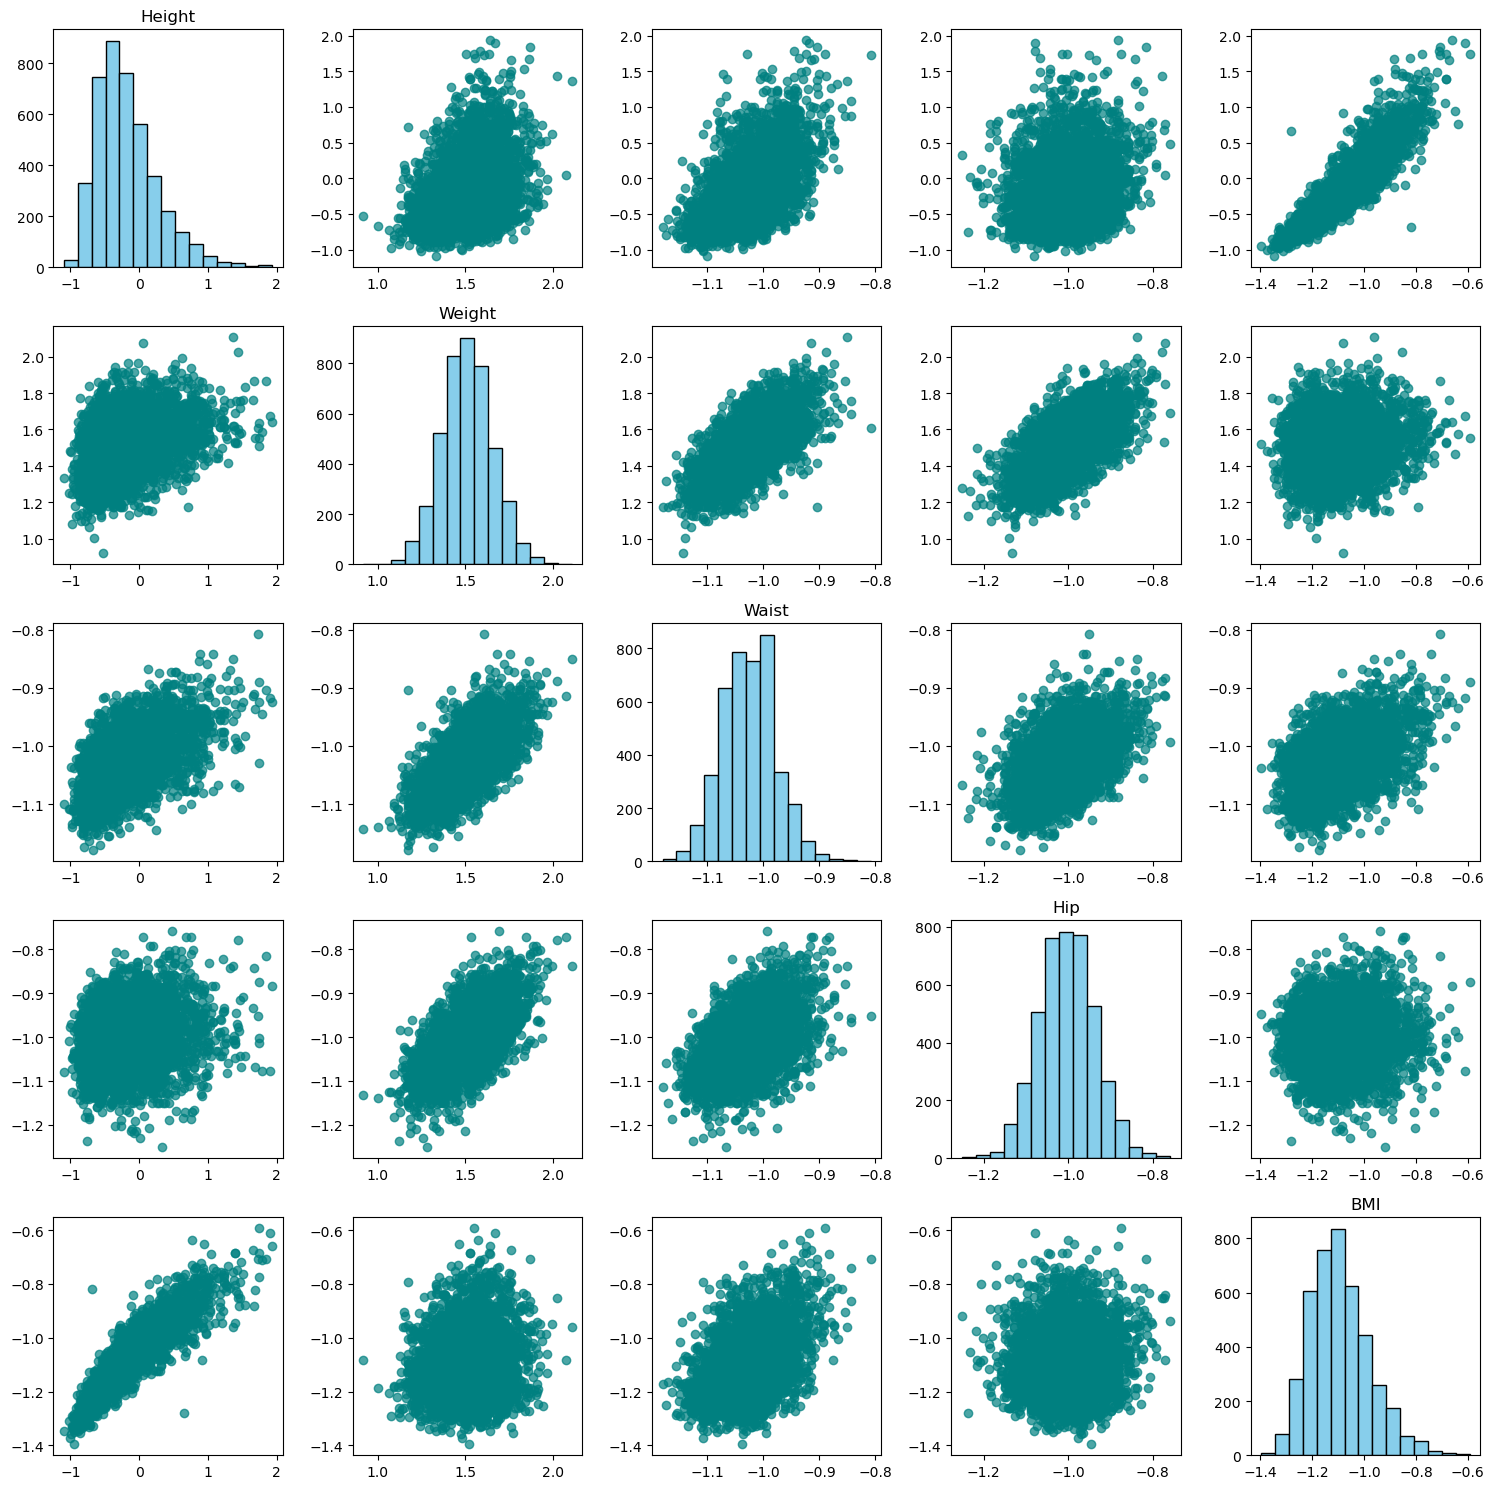

In [ ]:
# CREATING A SCATTERPLOT MATRIX (PAIRPLOT)

from itertools import combinations

variable_names = ['Height', 'Weight', 'Waist', 'Hip', 'BMI']
num_vars = len(variable_names)

fig, axes = plt.subplots(num_vars, num_vars, figsize=(15, 15))

for i, var1_idx in enumerate(range(num_vars)):
    for j, var2_idx in enumerate(range(num_vars)):
        ax = axes[i, j]
        if i == j:
            # DIAGONAL: HISTOGRAM
            ax.hist(zfemale[:, var1_idx], bins=15, color='skyblue', edgecolor='black')
            ax.set_title(variable_names[var1_idx])
        else:
            # OFF-DIAGONAL: SCATTERPLOT
            ax.scatter(zfemale[:, var2_idx], zfemale[:, var1_idx], alpha=0.7, color='teal')



plt.tight_layout()
plt.show()


In [ ]:
# COMPUTING PEARSON'S AND SPEARMAN'S CORRELATION COEFFICIENTS

from scipy.stats import pearsonr, spearmanr
print("Correlation Coefficients:\n")

variable_indices = {name: idx for idx, name in enumerate(variable_names)}

for var1, var2 in combinations(variable_names, 2):
    idx1 = variable_indices[var1]
    idx2 = variable_indices[var2]

    # Extract columns by integer index
    data1 = zfemale[:, idx1]
    data2 = zfemale[:, idx2]

    # Compute correlations
    pearson_corr, _ = pearsonr(data1, data2)
    spearman_corr, _ = spearmanr(data1, data2)

    print(f"{var1} vs {var2}: Pearson = {pearson_corr:.2f}, Spearman = {spearman_corr:.2f}")

Correlation Coefficients:

Height vs Weight: Pearson = 0.35, Spearman = 0.34
Height vs Waist: Pearson = 0.55, Spearman = 0.54
Height vs Hip: Pearson = 0.19, Spearman = 0.20
Height vs BMI: Pearson = 0.91, Spearman = 0.91
Weight vs Waist: Pearson = 0.67, Spearman = 0.67
Weight vs Hip: Pearson = 0.66, Spearman = 0.65
Weight vs BMI: Pearson = 0.15, Spearman = 0.14
Waist vs Hip: Pearson = 0.48, Spearman = 0.46
Waist vs BMI: Pearson = 0.45, Spearman = 0.42
Hip vs BMI: Pearson = 0.08, Spearman = 0.08


In [ ]:
# ADD WAIST-TO-HEIGHT AND WAIST-TO-HIP RATIOS
MALE = np.delete(MALE[:, ],0, axis = 0)
female_ratios = np.column_stack((FEMALE, FEMALE[:, 6] / FEMALE[:, 1], FEMALE[:, 6] / FEMALE[:, 5]))
male_ratios = np.column_stack((MALE, MALE[:, 6] / MALE[:, 1], MALE[:, 6] / MALE[:, 5]))

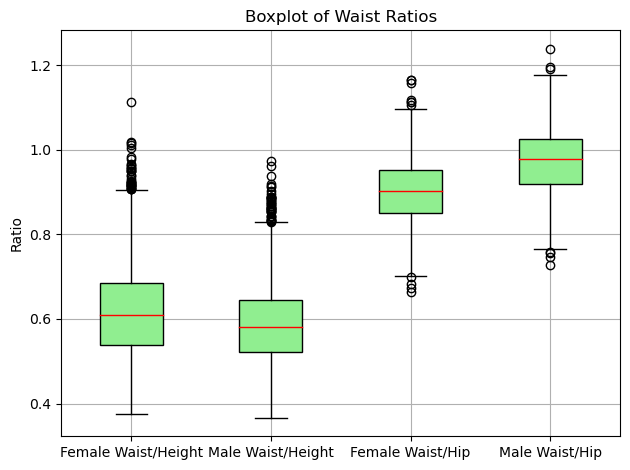

In [ ]:
# CREATING A BOX-AND-WHISKER PLOT WITH FOUR BOXES SIDE BY SIDE, COMPARING THE DISTRIBUTION OF THE WAIST-TO-HEIGHT RATIO AND
# THE WAIST-TO-HIP RATIO OF BOTH MALE AND FEMALE PARTICIPANTS

plt.boxplot([
    female_ratios[:, -2], male_ratios[:, -2],
    female_ratios[:, -1], male_ratios[:, -1]
], labels=['Female Waist/Height', 'Male Waist/Height', 'Female Waist/Hip', 'Male Waist/Hip'], patch_artist=True,
            boxprops=dict(facecolor="lightgreen"), medianprops=dict(color="red"))
plt.title("Boxplot of Waist Ratios")
plt.ylabel("Ratio")
plt.grid(True)
plt.tight_layout()
plt.show()

IN THE ABOVE BOXPLOT DIAGRAM, WE CAN SEE THAT -

WAIST-TO-HEIGHT RATIO -
- THE FEMALE WAIST-TO-HEIGHT RATIO HAS A MEDIAN LOWER THAN THE MALE WAIST-TO-HEIGHT RATIO, WHICH MEANS THE FEMALES GENERALLY HAVE A PROPORTIONALLY SMALLER WAIST RELATIVE TO HEIGHT COMPARED TO THE MALES.

WAIST-TO-HIP RATIO -
- THE MALE WAIST-TO-HIP RATIO HAS A HIGHER MEDIAN COMPARED TO FEMALES THAT MEANS THE MALES TEND TO HAVE A LESS PRONOUNCED DIFFERENCE BETWEEN WAIST AND HIP MEASUREMENTS WHILE THE FEMALES HAVE WIDER HIPS RELATIVE TO THEIR WAISTS.


ADVANTAGES OF BMI -

- SIMPLE TO CALCULATE.
- WIDELY USED AND RECOGNIZED.

DISADVANTAGES OF BMI -

- DOES NOT DIFFERENTIATE BETWEEN MUSCLE AND FAT.
- DOES NOT ACCOUNT FOR BODY DISTRIBUTION.

ADVANTAGES OF WAIST-TO-HEIGHT RATIO -

- BETTER INDICATION OF CENTRAL OBESITY.
- CORRELATES WELL WITH HEALTH RISKS.

DISADVANTAGE OF WAIST-TO-HEIGHT RATIO -

- REQUIRES ACCURATE HEIGHT AND WAIST MEASUREMENTS.

ADVANTAGE OF WAIST-TO-HIP RATIO -

- USEFUL FOR IDENTIFYING VISCERAL FAT RISKS.

DISADVANTAGE OF WAIST-TO-HIP RATIO -

- MAY NOT ACCOUNT FOR OVERALL OBESITY.


In [ ]:
# PRINTING 5 PERSONS WITH HIGHEST BMI AND PRINTING 5 PERSONS LOWEST BMI FROM (zfemale)

lowest_bmi_indices = np.argsort(new_FEMALE[:, 7])[:5]
highest_bmi_indices = np.argsort(new_FEMALE[:, 7])[-5:]
extreme_bmi_rows = zfemale[np.concatenate((lowest_bmi_indices, highest_bmi_indices))]

print("Standardized Body Measurements of Participants with Extreme BMI:\n", extreme_bmi_rows)

Standardized Body Measurements of Participants with Extreme BMI:
 [[ 1.93597861  1.6395234  -0.92430299 -0.88341262 -0.66056009  1.75401644
   1.70290348 -0.63236291]
 [ 1.90122179  1.6722357  -0.91816944 -1.07764189 -0.61149164  1.89713275
   1.55569814 -0.62164121]
 [ 1.83988623  1.86850949 -0.90385781 -0.81594351 -0.70758402  1.5740988
   1.16110603 -0.60221588]
 [ 1.78263971  1.5843214  -0.94474818 -1.07764189 -0.70962854  1.74174933
   1.28377715 -0.58347914]
 [ 1.74174933  1.50662969 -1.02857345 -1.01426181 -0.77505313  1.8480643
   1.87668756 -0.56972095]
 [-0.98154952  1.24288678 -1.13488842 -1.07355286 -1.32707317 -0.13920783
  -0.46019726  3.58958743]
 [-0.99177211  1.47391739 -1.03675152 -0.9692824  -1.35774095 -0.24961184
  -0.40908429  3.66057076]
 [-1.00812826  1.48413998 -1.10830967 -0.97746048 -1.3740971  -0.12285168
  -0.48064245  3.77814532]
 [-1.02243989  1.24902034 -1.10830967 -1.00812826 -1.31071702 -0.13102976
  -0.60944712  3.88528595]
 [-1.09604256  1.33489012 -